# KS - Kolmogorov Smirnof

Baseado nos artigos:
- https://medium.com/data-science/evaluating-classification-models-with-kolmogorov-smirnov-ks-test-e211025f5573
- https://medium.com/@kstarun/k-s-score-for-model-evaluation-5339f0a5c705
- https://medium.com/data-hackers/kolmogorov-smirnov-fb90394ca122

The KS statistic for two samples is simply the highest distance between their two CDFs, so if we measure the distance between the positive and negative class distributions, we can have another metric to evaluate classifiers.

CDF -> Função de distribuição acumulada
A CDF de uma variável aleatória X, denotada por F(x), é a função que dá a probabilidade de que X assuma um valor menor ou igual a x. Em outras palavras:

F(x) = P(X <= x)

In [28]:
from sklearn.datasets import load_iris
import pandas as pd
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

import warnings
warnings.filterwarnings('ignore')

In [29]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


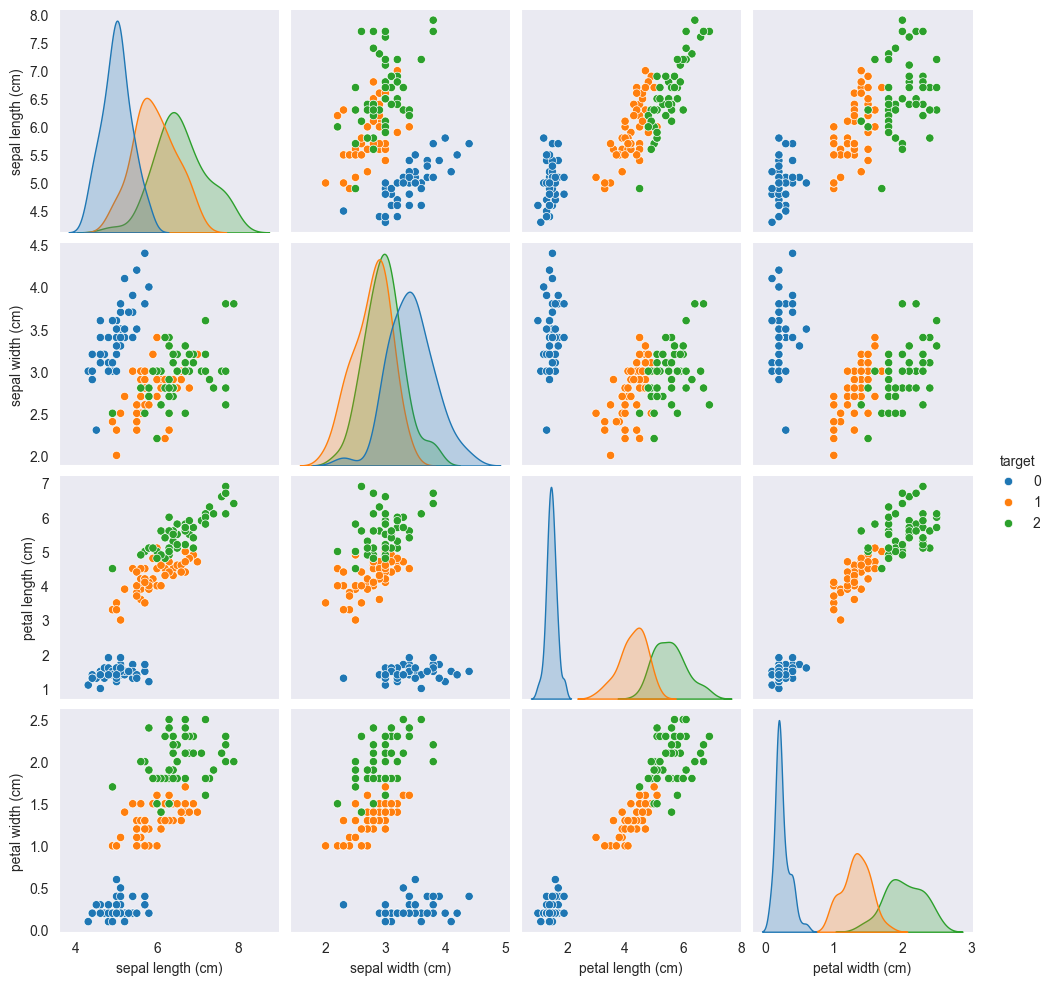

In [31]:
sns.pairplot(df, hue='target', palette='tab10');

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

RANDOM_STATE = 13

In [85]:
# Melhor modelo
df_best = df[df.target.isin([0, 2])]
df_best['target'].replace({2: 1}, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(df_best.iloc[:, :-1], df_best['target'], test_size=0.2, random_state=RANDOM_STATE)
svc_best = SVC(probability=True)
svc_best.fit(x_train, y_train)
y_pred_best = svc_best.predict(x_test)
y_pred_proba = svc_best.predict_proba(x_test)[:, 1]

print(classification_report(y_test, y_pred_best))

dbest = pd.DataFrame()
dbest['real'], dbest['proba'] = y_test, y_pred_proba


print(f'KS: {sts.ks_2samp(dbest[dbest.real == 0]['proba'], dbest[dbest.real == 1]['proba']).statistic}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

KS: 1.0


In [86]:
# Modelo médio
df_med = df[df.target.isin([1, 2])]
df_med['target'].replace({1: 0, 2: 1}, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(df_med.iloc[:, :-1], df_med['target'], test_size=0.2, random_state=RANDOM_STATE)
svc_med = SVC(probability=True)
svc_med.fit(x_train, y_train)
y_pred_med = svc_med.predict(x_test)
y_pred_proba = svc_med.predict_proba(x_test)[:, 1]

print(classification_report(y_test, y_pred_med))

dmed = pd.DataFrame()
dmed['real'], dmed['proba'] = y_test, y_pred_proba


print(f'KS: {sts.ks_2samp(dmed[dmed.real == 0]['proba'], dmed[dmed.real == 1]['proba']).statistic}')

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

KS: 0.9090909090909091


# Matthews correlation coefficient (MCC)

Baseada no artigo:
- https://thalesferraz.medium.com/as-principais-m%C3%A9tricas-de-classifica%C3%A7%C3%A3o-para-machine-learning-fac25d7021f6

In [ ]:
# Leva em consideração os valores da matriz de confusão, vai de -1 a 1
# próximo a -1 -> previsão inversa
# próximo a 0 -> previsão aleatória
# próximo a 1 -> previsão melhor``

from sklearn.metrics import matthews_corrcoef

print(matthews_corrcoef(y_test, y_pred_best))
print(matthews_corrcoef(y_test, y_pred_med))

1.0
0.9045340337332909
